## League of Legends - Koreand Ranked Games - Visualization/Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#chunk = 10 ** 6
#df_chunk = pd.read_csv('match_data_version1.csv', chunksize=chunk, iterator=True)
#df_match = pd.concat(df_chunk, ignore_index = True)
df_winner = pd.read_csv('match_winner_data_version1.csv')
df_loser = pd.read_csv('match_loser_data_version1.csv')

In [12]:
print(df_winner.shape)
df_winner.head(3)

(108829, 18)


,Unnamed: 0,teamId,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKills,inhibitorKills,baronKills,dragonKills,vilemawKills,riftHeraldKills,dominionVictoryScore,bans,gameId
0,0,200,Win,False,True,True,False,True,True,9,1,0,3,0,2,0,"[{'championId': 523, 'pickTurn': 6}, {'champio...",4.247263e+09
1,1,100,Win,False,False,False,False,True,True,4,0,0,2,0,2,0,"[{'championId': 523, 'pickTurn': 1}, {'champio...",4.247156e+09
2,2,200,Win,True,True,True,False,True,True,5,1,0,2,0,2,0,"[{'championId': 350, 'pickTurn': 6}, {'champio...",4.243963e+09


In [13]:
print(df_loser.shape)
df_loser.head(3)

(108829, 18)


,Unnamed: 0,teamId,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKills,inhibitorKills,baronKills,dragonKills,vilemawKills,riftHeraldKills,dominionVictoryScore,bans,gameId
0,0,100,Fail,True,False,False,False,False,False,0,0,0,0,0,0,0,"[{'championId': -1, 'pickTurn': 1}, {'champion...",4.247263e+09
1,1,200,Fail,True,True,False,False,False,False,2,0,0,0,0,0,0,"[{'championId': 875, 'pickTurn': 6}, {'champio...",4.247156e+09
2,2,100,Fail,False,False,False,False,False,False,0,0,0,0,0,0,0,"[{'championId': 110, 'pickTurn': 1}, {'champio...",4.243963e+09


#### Studying the probability of win/lose by doing the firts objectives

In [36]:
fb_winner = df_winner['firstBlood'].value_counts()

In [37]:
fb_loser = df_loser['firstBlood'].value_counts()

In [19]:
df_winner['firstTower'].value_counts()

True     78927
False    29902
Name: firstTower, dtype: int64

In [20]:
df_loser['firstTower'].value_counts()

False    80255
True     28574
Name: firstTower, dtype: int64

In [21]:
df_winner['firstDragon'].value_counts()

True     60912
False    47917
Name: firstDragon, dtype: int64

In [22]:
df_loser['firstDragon'].value_counts()

False    76299
True     32530
Name: firstDragon, dtype: int64

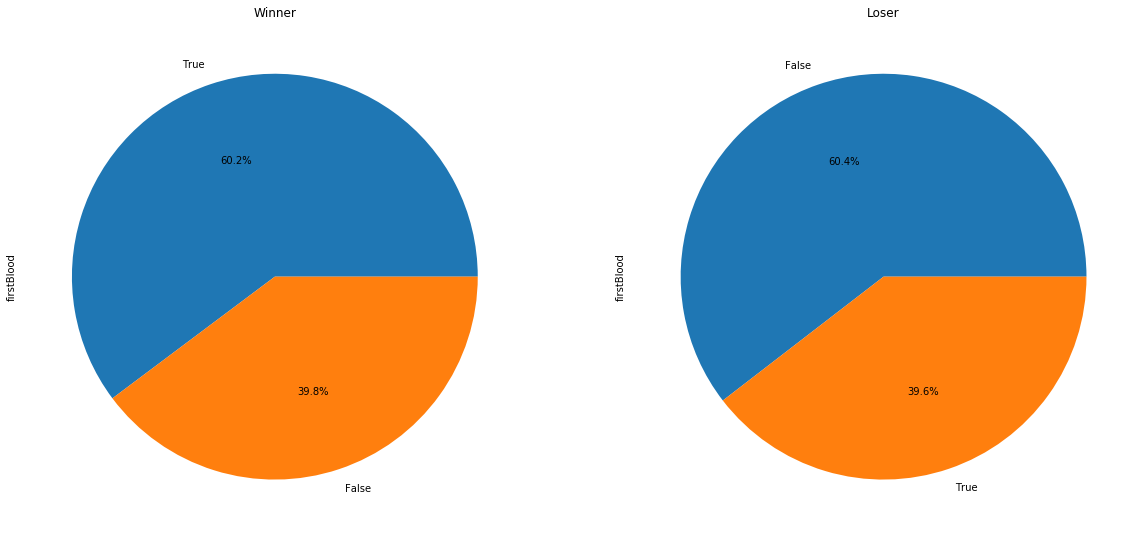

In [44]:
fig = plt.figure(figsize=(20,10))
ax_1 = fig.add_subplot(1,2,1)
fb_winner.plot.pie(ax=ax_1, title = 'Winner', autopct='%1.1f%%')
ax_2 = fig.add_subplot(1,2,2)
fb_loser.plot.pie(ax=ax_2, title = 'Loser', autopct='%1.1f%%')